In [1]:
import numpy as np
import pandas as pd
from tools.get_data.get_data_h5 import *
from pandasgui import show
import talib as ta
import datetime
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import roll_time_series
import numpy as np
import pandas as pd
import os
import plotly.express as px



### 1. 获取factor数据

In [2]:
from importlib import reload
import factors as dl
reload(dl)
run = 0
if run == 1:
    data = get_data(symbol="rb99", freq="minbar", type="future",
                    source_dir="Y:/DataBase_RQ_files/")
    data["sma_diff_5"] = dl.sma_diff(data, 5)
    data["sma_diff_20000"] = dl.sma_diff(data, 20000)
    data["ema_diff_300"] = dl.ema_diff(data, 300)
    data["ema_diff_1000"] = dl.ema_diff(data, 1000)
    data["sma_of_sma_5_10"] = dl.sma_of_sma(data, 5, 10)
    data["ema_of_ema_10_30"] = dl.ema_of_ema(data, 10, 30)
    data["sma_diff_sma_5_100"] = dl.sma_diff_sma(data, 5, 100)
    data["high_60"] = dl.high(data, 60)
    data["low_60"] = dl.low(data, 60)
    data["high_60"] = dl.high(data, 60)
    data["low_60"] = dl.low(data, 60)
    data["wl_60"] = dl.wl(data, 60)
    data["wl_60"] = dl.wl(data, 60)
    data["macd_dif"], data["macd_dea"], data["macd_hist"], data["macd_signal"] = dl.MACD(
        data, fast=10, slow=60, mid=15)
    data["slope"] = dl.slope(data, 60)
    data["rsi_60"] = dl.rsi(data, 60)
    data["sar"] = dl.sar(data)
    data["rwr_60"] = dl.rwr(data, 60)
    data["rsi_100"] = dl.rsi(data, 100)
    data["rwr_100"] = dl.rwr(data, 100)
    data["aroon_up"], data["aroon_down"], data["aroon"] = dl.aroon(data, 60)
    data["tendstrength"] = dl.tendstrength(data, 120)
    data["boll"] = dl.boll(data, 200)
    data["don"] = dl.don(data, 100)
    data["sf01"] = dl.sf01(data, 60)
    data["cor_vol"] = dl.cor_vol(data, 200)
    data["cor_oi"] = dl.cor_oi(data, 1000)

    l = [1, 3, 5] + (list(range(10, 201, 5)))
    for i in l:
        data["shift_{}_rtn".format(i)] = dl.rtn_shift(data.close, -i)
    print("liqka前工作完成", len(data))

    data["long_liqka"] = dl.long_liqka(data)
    data["short_liqka"] = dl.short_liqka(data)
    data.dropna(inplace=True)
    data.to_parquet(".//data//factors.parquet")
    

data = pd.read_parquet(".//data//factors.parquet")

### 2. 因子分析

#### 2.1 创建因子rank_df/results_df(耗时长)

In [3]:
from importlib import reload    
import factor_analysis as fa
reload(fa)
data = pd.read_parquet(".//data//factors.parquet")
data.set_index("datetime", inplace=True, drop=True)
factors_cols = []
rtn_cols = []
for col in data.columns:
    if col not in ['datetime', 'trading_date', "symbol"]:
        if "rtn" not in col and "liqka" not in col:
            factors_cols.append(col)
        else:
            rtn_cols.append(col)
factors = data[factors_cols]
rtn = data[rtn_cols]
run = 0
if run == 1:
    fal = fa.FactorAnalysis_ori()
    rank_df, results_df = fal.factor_ranked(
    factors, rtn, save=True, sample_size=60000, bins=20)

    rank_df, results_df = fal.factor_ranked(factors, rtn,save=True,sample_size=30000,bins=20)
    rank_df, results_df = fal.factor_ranked(factors, rtn,save=True,sample_size=20000,bins=15)
    rank_df, results_df = fal.factor_ranked(factors, rtn,save=True,sample_size=10000,bins=15)
    rank_df, results_df = fal.factor_ranked(factors, rtn,save=True,sample_size=5000,bins=10)
    rank_df, results_df = fal.factor_ranked(factors, rtn,save=True,sample_size=2000,bins=10)

#### 2.2 因子分析

In [4]:
os.listdir(".//data//")

['factors.parquet',
 'mod',
 'symbol_10000_15_rank_df.parquet',
 'symbol_10000_15_results_df.parquet',
 'symbol_20000_15_rank_df.parquet',
 'symbol_20000_15_results_df.parquet',
 'symbol_2000_10_rank_df.parquet',
 'symbol_2000_10_results_df.parquet',
 'symbol_30000_20_rank_df.parquet',
 'symbol_30000_20_results_df.parquet',
 'symbol_5000_10_rank_df.parquet',
 'symbol_5000_10_results_df.parquet',
 'symbol_60000_20_rank_df.parquet',
 'symbol_60000_20_results_df.parquet']

rank_df已经存在,直接读取
seletced 10000_15                                         mean_rtn   win_rate  count
factor         rank return                                        
sma_diff_20000 5.0  shift_200_rtn_mean  0.167856  55.230024  12390
                    shift_195_rtn_mean  0.164566  55.367232  12390
                    shift_190_rtn_mean  0.162177  55.060533  12390
                    shift_185_rtn_mean  0.160881  55.149314  12390
                    shift_180_rtn_mean  0.157347  55.076675  12390
...                                          ...        ...    ...
open_interest  7.0  shift_190_rtn_mean -0.192967  45.055494  10001
sma_diff_20000 14.0 shift_195_rtn_mean -0.193304  49.135203  46138
                    shift_200_rtn_mean -0.195853  49.217565  46138
open_interest  7.0  shift_195_rtn_mean -0.201221  44.405559  10001
                    shift_200_rtn_mean -0.209925  43.875612  10001

[22596 rows x 3 columns]
sample_size and bins 10000_15


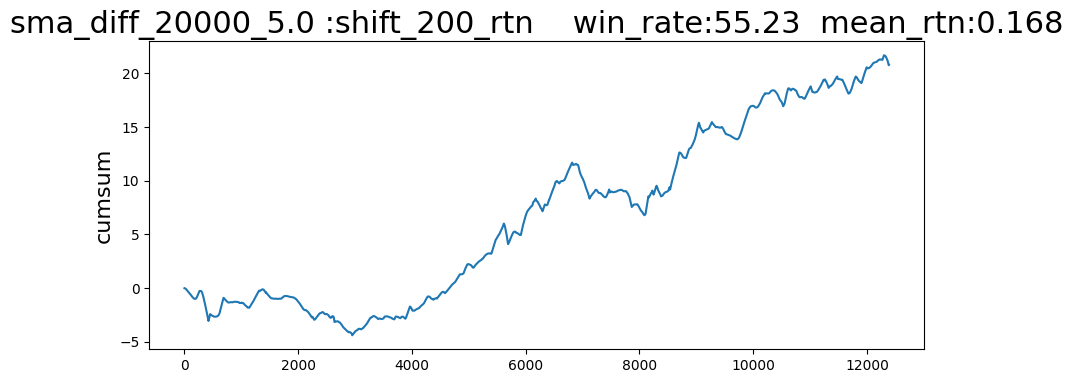

rank_df已经存在,直接读取
seletced 20000_15                                        mean_rtn   win_rate  count
factor        rank return                                        
open          11.0 shift_200_rtn_mean  0.205929  59.681716  14264
close         11.0 shift_200_rtn_mean  0.202879  59.576116  14202
low           11.0 shift_200_rtn_mean  0.202148  59.564912  14250
high          11.0 shift_200_rtn_mean  0.199690  59.504770  14256
open          11.0 shift_195_rtn_mean  0.198470  59.127874  14264
...                                         ...        ...    ...
ema_diff_1000 13.0 shift_180_rtn_mean -0.251923  46.132055  18356
                   shift_185_rtn_mean -0.255527  46.132055  18356
                   shift_190_rtn_mean -0.260275  46.132055  18356
                   shift_195_rtn_mean -0.265149  45.984964  18356
                   shift_200_rtn_mean -0.270777  45.974068  18356

[22596 rows x 3 columns]
sample_size and bins 20000_15


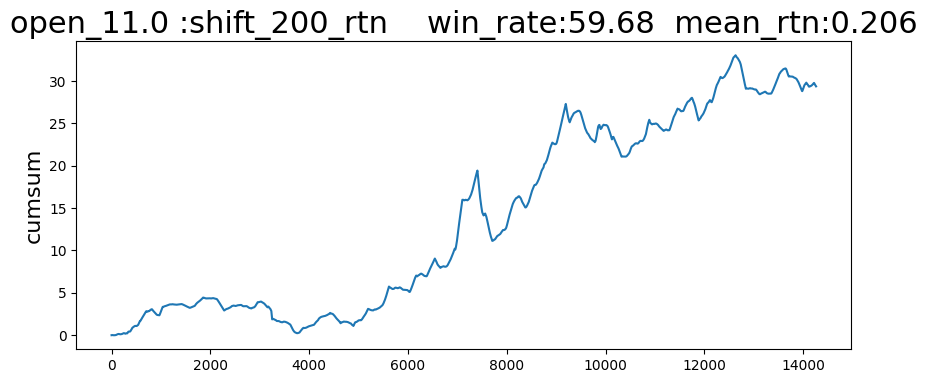

rank_df已经存在,直接读取
seletced 2000_10                                        mean_rtn   win_rate  count
factor        rank return                                        
boll          9.0  shift_200_rtn_mean  0.092236  53.616694  31244
open_interest 0.0  shift_200_rtn_mean  0.090120  53.189953  69233
boll          9.0  shift_195_rtn_mean  0.089419  53.789528  31244
open_interest 0.0  shift_195_rtn_mean  0.086944  53.119177  69233
rwr_100       9.0  shift_200_rtn_mean  0.086006  53.402465  33270
...                                         ...        ...    ...
cor_vol       0.0  shift_180_rtn_mean -0.167694  47.101516  32517
                   shift_185_rtn_mean -0.171726  47.104591  32517
                   shift_190_rtn_mean -0.174960  46.910847  32517
                   shift_200_rtn_mean -0.176751  46.935449  32517
                   shift_195_rtn_mean -0.176988  47.119968  32517

[15120 rows x 3 columns]
sample_size and bins 2000_10


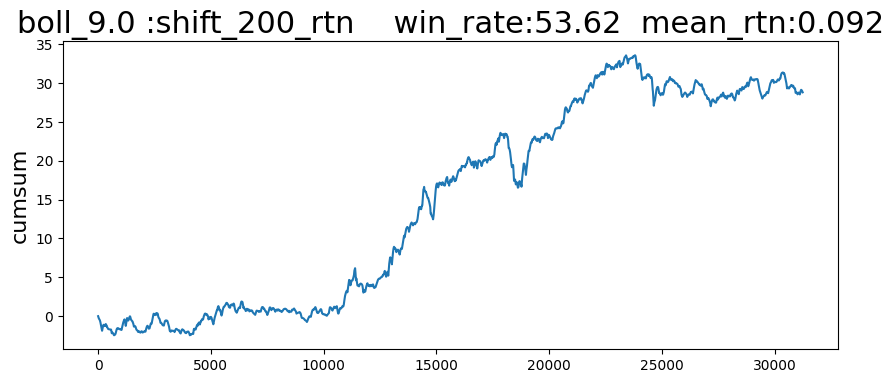

rank_df已经存在,直接读取
seletced 30000_20                                        mean_rtn   win_rate  count
factor        rank return                                        
high          11.0 shift_200_rtn_mean  0.382730  68.289439   7518
open          11.0 shift_200_rtn_mean  0.381867  68.157019   7515
close         11.0 shift_200_rtn_mean  0.380131  68.302087   7521
low           11.0 shift_200_rtn_mean  0.378350  68.193998   7464
high          11.0 shift_195_rtn_mean  0.374272  68.156425   7518
...                                         ...        ...    ...
ema_diff_1000 18.0 shift_180_rtn_mean -0.317506  47.941460  12436
                   shift_185_rtn_mean -0.321250  48.102284  12436
                   shift_190_rtn_mean -0.325351  48.456095  12436
                   shift_195_rtn_mean -0.330068  48.657124  12436
                   shift_200_rtn_mean -0.337005  48.592795  12436

[30030 rows x 3 columns]
sample_size and bins 30000_20


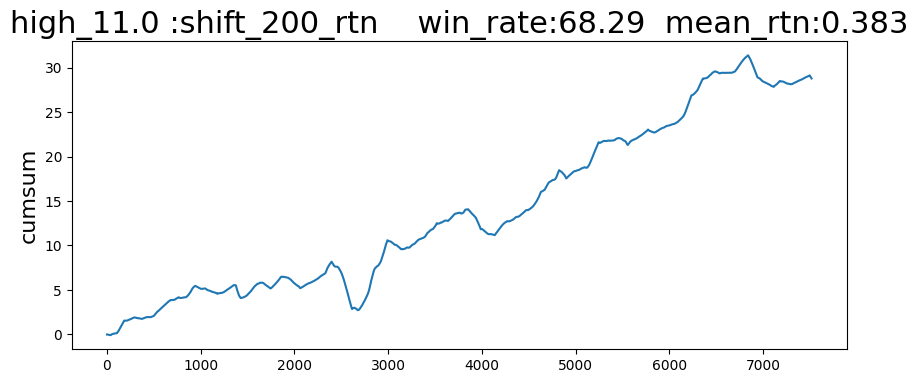

rank_df已经存在,直接读取
seletced 5000_10                                 mean_rtn   win_rate  count
factor rank return                                        
low    6.0  shift_200_rtn_mean  0.141654  55.133552  22538
open   6.0  shift_200_rtn_mean  0.140006  55.019314  22523
close  6.0  shift_200_rtn_mean  0.139166  55.019099  22514
low    6.0  shift_195_rtn_mean  0.136849  55.066998  22538
high   6.0  shift_200_rtn_mean  0.135510  54.694815  22642
...                                  ...        ...    ...
       0.0  shift_200_rtn_mean -0.152037  49.810158  50305
low    0.0  shift_195_rtn_mean -0.152087  49.856980  49993
open   0.0  shift_200_rtn_mean -0.152642  49.754706  50144
close  0.0  shift_200_rtn_mean -0.153171  49.773566  50125
low    0.0  shift_200_rtn_mean -0.153998  49.748965  49993

[15120 rows x 3 columns]
sample_size and bins 5000_10


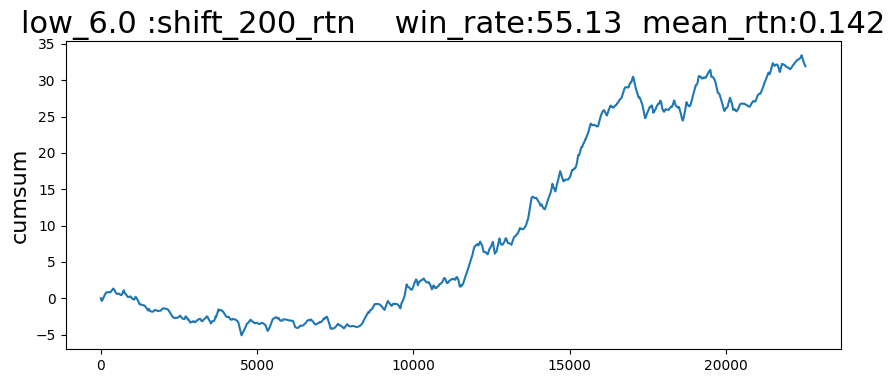

rank_df已经存在,直接读取
seletced 60000_20                                         mean_rtn   win_rate  count
factor         rank return                                        
sma_diff_20000 5.0  shift_200_rtn_mean  0.196247  60.719934  15807
                    shift_195_rtn_mean  0.190231  60.207503  15807
                    shift_190_rtn_mean  0.184327  59.625482  15807
                    shift_185_rtn_mean  0.179202  59.631809  15807
               6.0  shift_200_rtn_mean  0.175778  60.884025   9321
...                                          ...        ...    ...
               11.0 shift_180_rtn_mean -0.310200  43.075624  10658
                    shift_185_rtn_mean -0.314326  42.719084  10658
                    shift_190_rtn_mean -0.318655  42.803528  10658
                    shift_195_rtn_mean -0.325258  42.428223  10658
                    shift_200_rtn_mean -0.332329  42.278101  10658

[29988 rows x 3 columns]
sample_size and bins 60000_20


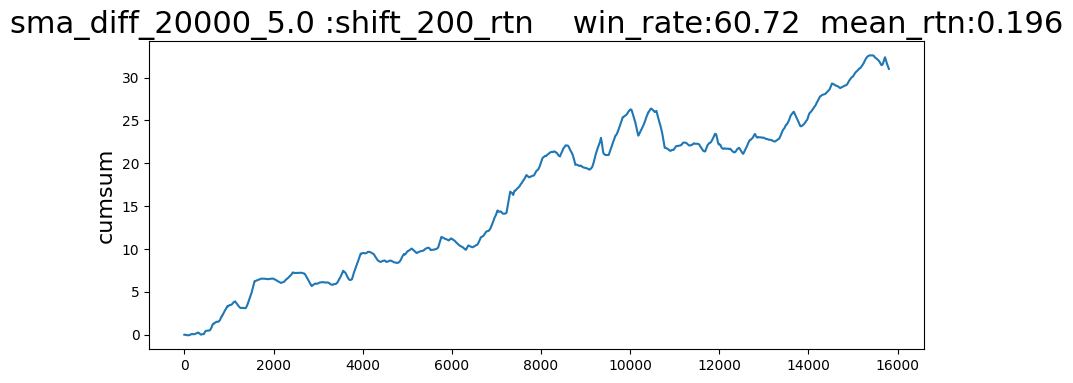

In [13]:
from importlib import reload
import factor_analysis as fa
reload(fa)
fal = fa.FactorAnalysis_ori()
seletced ={}
for  i in os.listdir(".//data//"):
    if "_results_df" in i:
        _rank = i.replace("_results_df", "_rank_df")
        _rank_df = pd.read_parquet(".//data//"+_rank)[-300000:]
        sample_size,bins = i[7:-19].split("_")
        sample_size =int(sample_size)
        bins = int(bins)
        _results_df = fal.cal_rank_results(factors, rtn, rank_df = _rank_df, sample_size=sample_size, bins=bins)
        _results_df.drop(['long_liqka_mean', 'short_liqka_mean','long_liqka_win_rate', 'short_liqka_win_rate'],axis=1,inplace=True)
        # # _results_df = pd.read_parquet(".//data//"+i)
        seletced[i[7:-19]] = fal.factors_select(_results_df, win_rate=0, rtn=-3,count=None)
        print("seletced", i[7:-19], seletced[i[7:-19]])
        print("sample_size and bins", i[7:-19])
        fal.cumsum_plot(rank_df = _rank_df, 
                        results_df = _results_df,
                        n =1,
                        sorted="mean_rtn")


In [ ]:
rank_df = pd.read_parquet(".//data//symbol_20000_15_rank_df.parquet")
results_df = pd.read_parquet(".//data//symbol_20000_15_results_df.parquet")


In [ ]:
def cumsum_plot(rank_df,
                results_df,
                n =3,#画出前n个因子的图
                show_dt =False,#画图是否显示时间信息-因为数据并非时间连续, 选True会导致图像不连续
                sorted ="mean_rtn",
                selected_args={"win_rate":50,"rtn":0.1,"count":None}):
    for k,v in selected_args.items():
        if k == "win_rate":
            win_rate = v
        if k == "rtn":
            rtn = v
        if k == "count":
            count = v
            
    seletced = fal.factors_select(results_df, win_rate=win_rate, rtn=rtn,count=count)
    seletced = seletced.sort_values(sorted, ascending=False)   
    factor = seletced.index.get_level_values(0)
    rank = seletced.index.get_level_values(1)
    rtn = seletced.index.get_level_values(2)
    
    for i in range(n):
        s = rank_df[rtn[i][:-5]][rank_df[factor[i]+"_rank"] == rank[i]]
        s = s.cumsum()/100
        if show_dt == True:
            s.reset_index(inplace=True,drop=True)
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.plot(s)
        ax.set_ylabel("cumsum", fontsize=16)
        ax.set_title(f"{factor[i]}_{rank[i]}:{s.name}",fontsize = 22)

  
        
cumsum_plot(rank_df, n=1,results_df =results_df, show_dt=False, sorted="mean_rtn", selected_args={"win_rate":50,"rtn":0.1,"count":None})    
    

In [ ]:
list(range(1))

In [ ]:
data = pd.read_parquet(".//data//factors.parquet")
data.set_index("datetime", inplace=True, drop=True)
factors_cols = []
rtn_cols = []
for col in data.columns:
    if col not in ['datetime', 'trading_date', "symbol"]:
        if "rtn" not in col and "liqka" not in col:
            factors_cols.append(col)
        else:
            rtn_cols.append(col)
results_df= pd.DataFrame()


In [ ]:
for i in os.listdir(".//data//mod//"):
    name = i.replace("rank_df", "results_df")
    print(name)

In [ ]:
results_df = pd.read_parquet(".//data//symbol_10000_15_rank_df.parquet")
results_df.columns

In [ ]:
files = os.listdir(".//data//mod//")
for file in files :
    if "rank_df" in file:
        name = file.replace("rank_df", "results_df")
        rank_df = pd.read_parquet(".//data//mod//"+file)
        for i in factors_cols:
            count_df = rank_df.groupby(f"{i}_rank")["open"].count()
            count_df.rename("counts", inplace=True)
            mean_rtn = rank_df.groupby(f"{i}_rank")[
                [rtn for rtn in rtn_cols]].mean()
            win_rate = rank_df.groupby(f"{i}_rank")[
                [rtn for rtn in rtn_cols]].apply(lambda x: (x > 0).mean()*100)
            result = pd.merge(
                mean_rtn, win_rate, on=f"{i}_rank", how="outer", suffixes=("_mean", "_win_rate")).merge(count_df, on=f"{i}_rank", how="outer")
            # result.index.name = "rank"
            result.index = pd.MultiIndex.from_product(
                [[i], result.index], names=["factor", "rank"])
            results_df = pd.concat([results_df, result], axis=0)
            
            old_results =pd.read_parquet(".//data//"+name)
            if len(old_results) !=  len(results_df):
                # raise ValueError(name,"长度不一致")
                pass
            print(name, "修复完成")
            results_df.to_parquet(".//data//mod//"+name)

In [ ]:
rank_df2 = pd.merge(rank_df, rtns, left_index=True, right_index=True)
len(rank_df2) == len(rank_df)

In [ ]:
columns_to_drop = rank_df.filter(like="shift_rtn").columns
rank_df2 = rank_df.drop(columns=columns_to_drop)
rank_df2[["long_liqka", "short_liqka"]]

In [ ]:
for i in seletced.keys():
    print(i)
    show(seletced[i])

In [ ]:

df27 = rank_df[["high_60_rank","shift_190_rtn"]][rank_df["high_60_rank"]==27]
cum =df27.shift_190_rtn.cumsum()
#画出cum
import matplotlib.pyplot as plt
plt.plot(cum)
    

In [ ]:
# 指数加权移动平均（EWMA）参数
lambda_ = 0.95

# 计算因子收益率的EWMA
ewma = factor_returns.ewm(alpha=1-lambda_).mean()

# 计算半衰期
half_life = -np.log(2) / np.log(1 - lambda_)
print(f"因子半衰期：{half_life:.2f} 个月")


In [ ]:
rank_df

In [ ]:
rank_df.groupby("low_rank")["shift_190_rtn"].cumsum()
